![](https://github.com/oracle-devrel/leagueoflegends-optimizer/raw/livelabs/images/structure_2023.webp)


If we haven't already, we need to install Python dependencies for our environment.

In [ ]:
#!pip install -r /home/datascience/leagueoflegends-optimizer/deps/requirements_2023.txt

# Data Preparation & Exploration

First, we will read the data from our previously-exported CSV file. Then, we will split the CSV file into train and test so that we can use different CSV files for training and testing.

In [2]:
# Imports
import pandas as pd
from autogluon.tabular import TabularDataset
from sklearn.model_selection import train_test_split
import warnings
import numpy as np
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
print(plt.style.available)
plt.style.use('ggplot')

/home/datascience/.conda/envs/last/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [3]:
df = pd.read_csv(
    "/home/datascience/performance_report.csv",
    skipinitialspace=True,
    index_col=[0]
)
# special train-test split into two equally shaped dataframes
df['split'] = np.random.randn(df.shape[0], 1)

msk = np.random.rand(len(df)) <= 0.85 # I create a boolean mask so my resulting dataframe is easily filterable,
# like this:
train = df[msk]
test = df[~msk]

# put into files for future use
train.to_csv('train.csv')
test.to_csv('test.csv')

<Axes: >

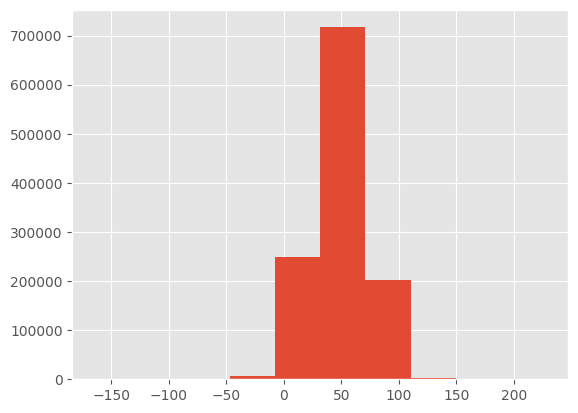

In [4]:
train['calculated_player_performance'].hist()

In [5]:
train[['calculated_player_performance', 'f1', 'f2', 'f3']].describe()

,calculated_player_performance,f1,f2,f3
count,1.178546e+06,1.178546e+06,1.178546e+06,1.178546e+06
mean,4.928415e+01,1.996634e-01,4.803698e-01,5.113427e-01
std,2.238612e+01,1.073500e-01,2.478950e-01,9.393925e-02
min,-1.642900e+02,0.000000e+00,0.000000e+00,3.839015e-05
25%,3.364000e+01,1.249594e-01,3.030835e-01,4.620412e-01
50%,4.921000e+01,1.944172e-01,4.643539e-01,5.062270e-01
75%,6.509000e+01,2.678761e-01,6.395516e-01,5.569881e-01
max,2.279500e+02,1.446433e+00,3.678832e+00,4.508792e+00


array([[<Axes: title={'center': 'assists'}>,
        <Axes: title={'center': 'baronKills'}>,
        <Axes: title={'center': 'champExperience'}>,
        <Axes: title={'center': 'deaths'}>,
        <Axes: title={'center': 'detectorWardsPlaced'}>],
       [<Axes: title={'center': 'dragonKills'}>,
        <Axes: title={'center': 'goldEarned'}>,
        <Axes: title={'center': 'goldSpent'}>,
        <Axes: title={'center': 'kills'}>,
        <Axes: title={'center': 'largestCriticalStrike'}>],
       [<Axes: title={'center': 'largestMultiKill'}>,
        <Axes: title={'center': 'largestKillingSpree'}>,
        <Axes: title={'center': 'doubleKills'}>,
        <Axes: title={'center': 'tripleKills'}>,
        <Axes: title={'center': 'quadraKills'}>],
       [<Axes: title={'center': 'pentaKills'}>,
        <Axes: title={'center': 'totalDamageDealt'}>,
        <Axes: title={'center': 'totalDamageTaken'}>,
        <Axes: title={'center': 'visionScore'}>,
        <Axes: title={'center': 'wardsKil

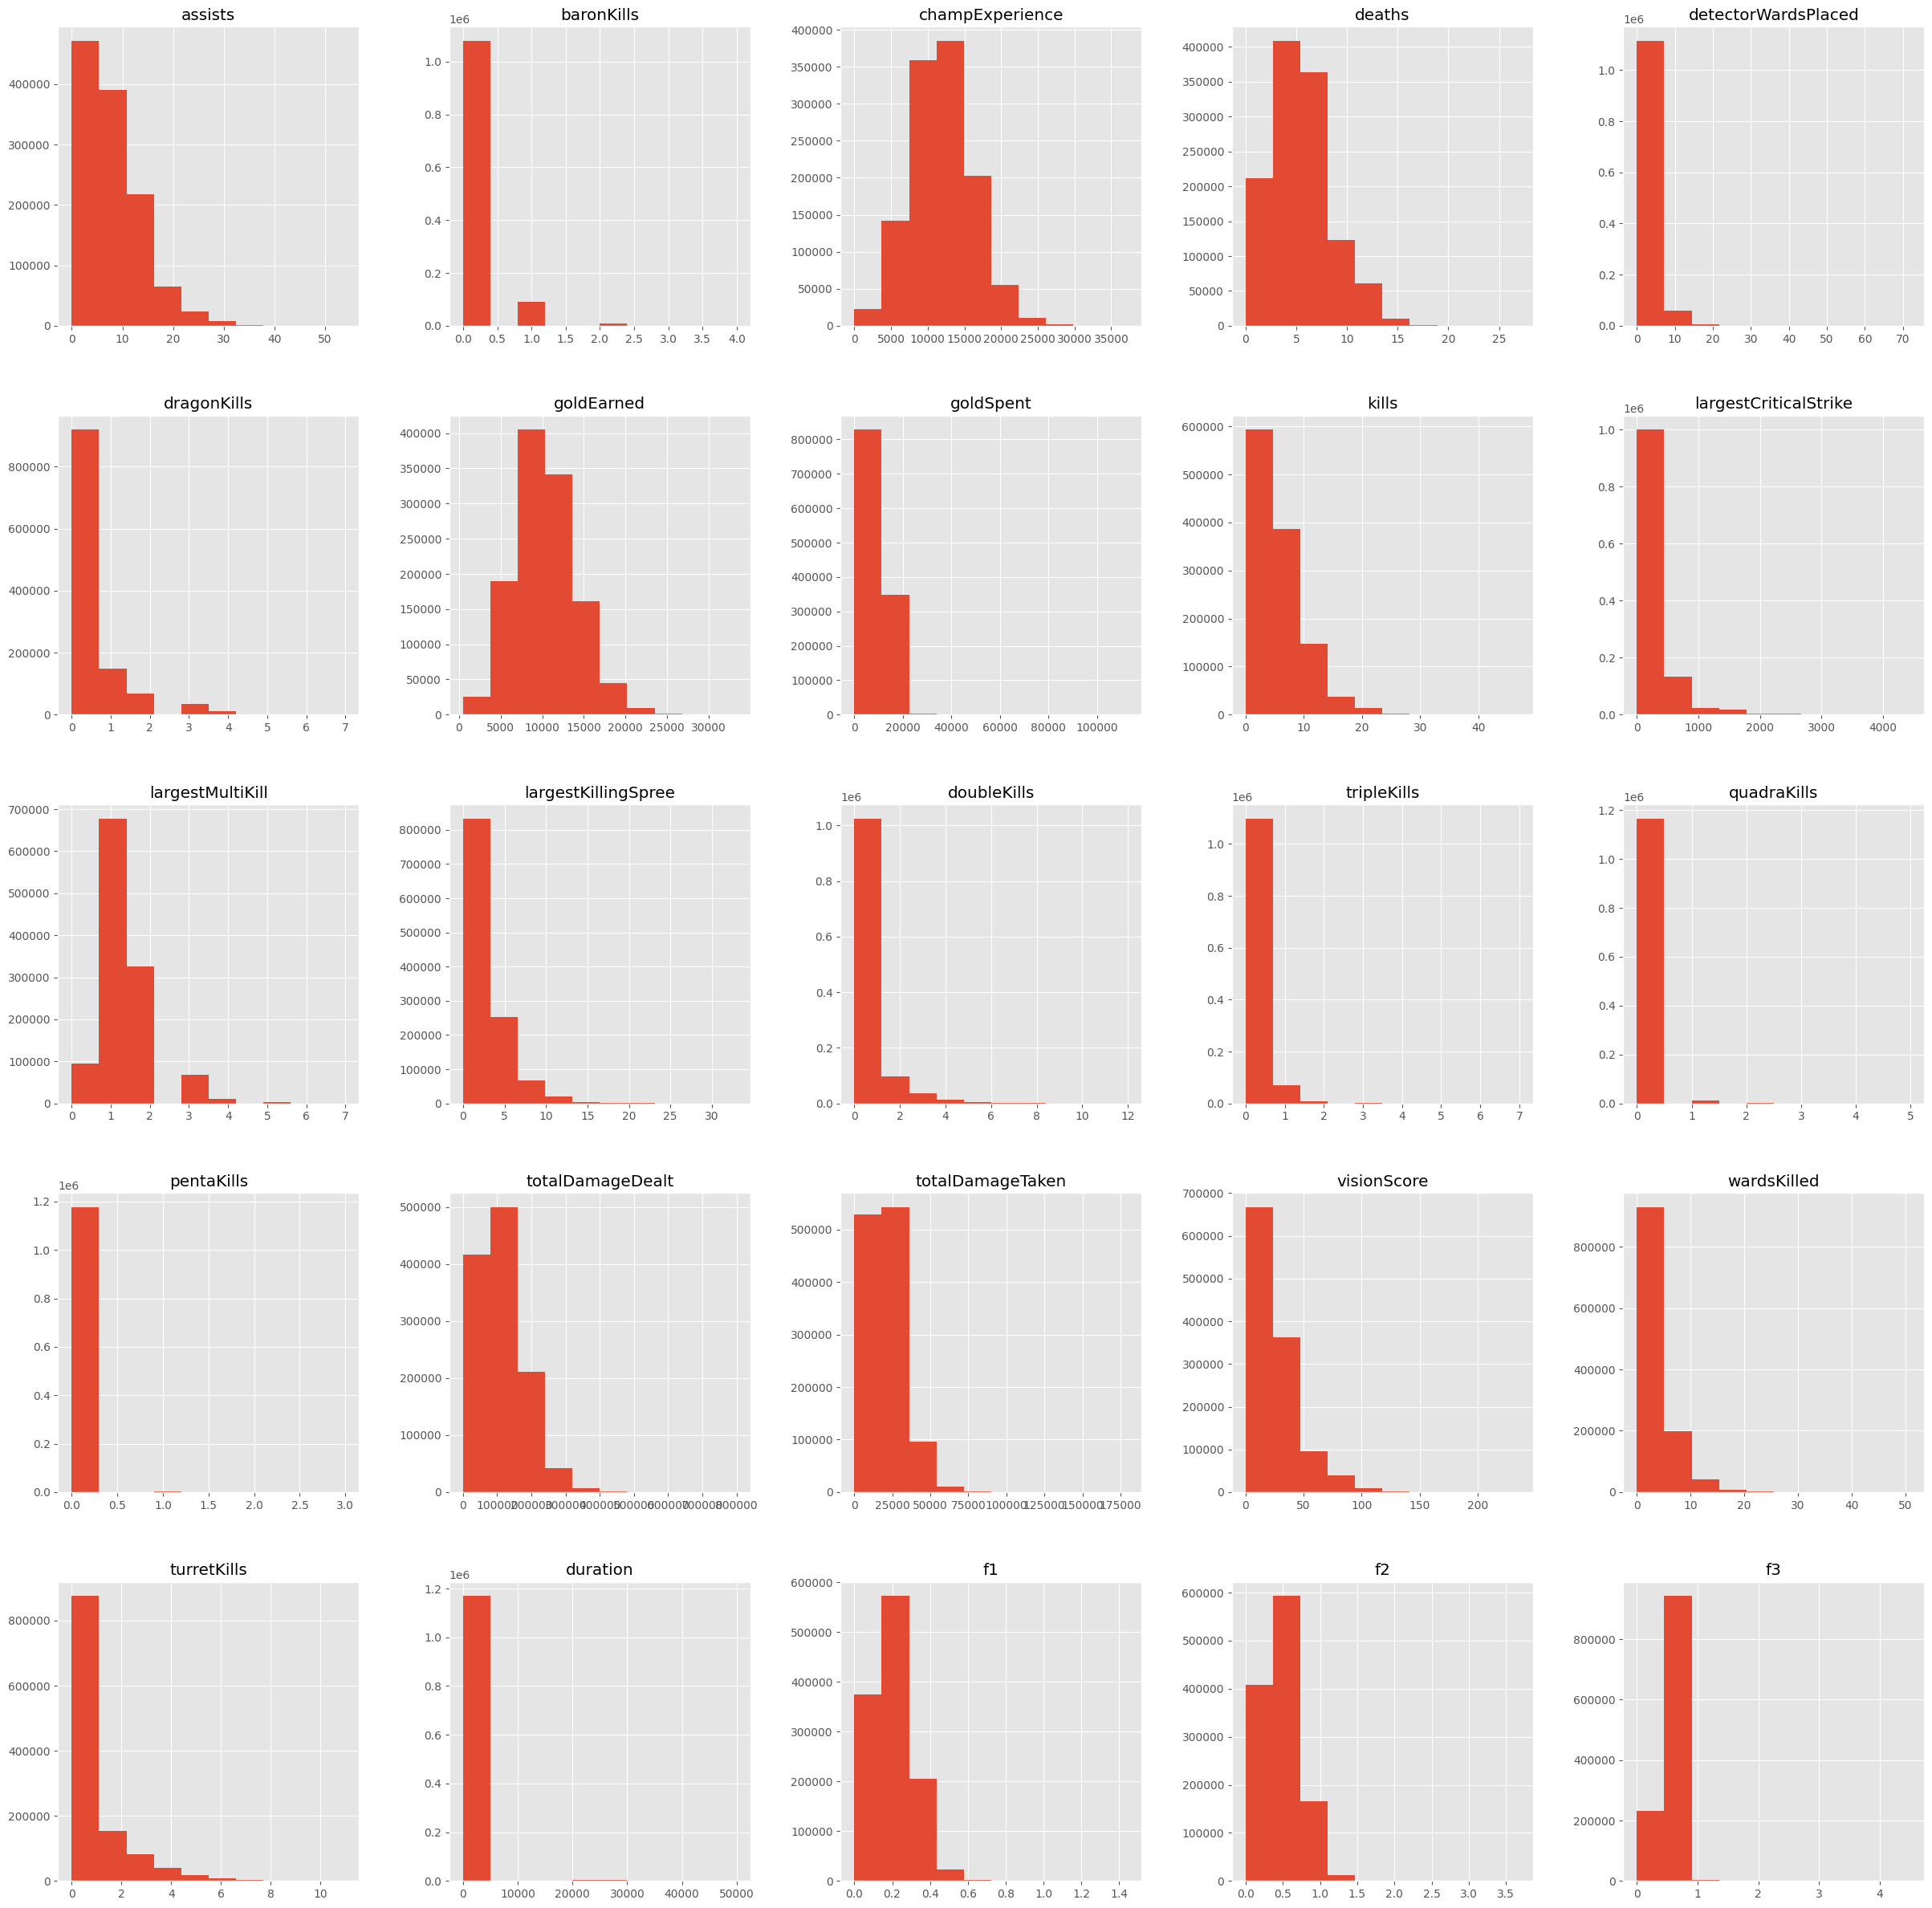

In [6]:
train.hist(column=['assists', 'baronKills', 'champExperience',
                   'deaths', 'detectorWardsPlaced', 'dragonKills', 'goldEarned', 
                   'goldSpent', 'kills', 'largestCriticalStrike', 'largestMultiKill', 'largestKillingSpree',
                   'doubleKills', 'tripleKills', 'quadraKills', 'pentaKills', 'totalDamageDealt', 'totalDamageTaken', 'visionScore',
                   'wardsKilled', 'turretKills', 'duration', 'f1', 'f2', 'f3'],
           figsize=(30, 30),
           bins=10)

In [7]:
X = train

# We will create a first model with no f's, and removing the auxiliary 'split' column (which was used for train-test splitting).
X = X.drop(columns=['f1', 'f2', 'f3', 'f4', 'f5', 'split'])

In [8]:
# We create a TabularDataset object (it's a Pandas Dataframe with more powers)
train_data = TabularDataset(X)

In [9]:
# This is the kind of data we can expect:
train_data.tail(2)

,assists,baronKills,bountyLevel,champExperience,champLevel,championId,championName,championTransform,consumablesPurchased,damageDealtToBuildings,...,turretsLost,unrealKills,visionScore,visionWardsBoughtInGame,wardsKilled,wardsPlaced,win,match_identifier,duration,calculated_player_performance
1386857,4.0,0.0,0.0,5299.0,9.0,236.0,Lucian,0.0,3.0,410.0,...,2.0,0.0,6.0,0.0,0.0,4.0,0.0,3.330618e+09,15.433333,24.90
1386858,1.0,0.0,0.0,4032.0,7.0,143.0,Zyra,0.0,4.0,349.0,...,2.0,0.0,24.0,2.0,3.0,9.0,0.0,3.330618e+09,15.433333,9.28


In [10]:
train_data.columns

Index(['assists', 'baronKills', 'bountyLevel', 'champExperience', 'champLevel',
       'championId', 'championName', 'championTransform',
       'consumablesPurchased', 'damageDealtToBuildings',
       ...
       'turretsLost', 'unrealKills', 'visionScore', 'visionWardsBoughtInGame',
       'wardsKilled', 'wardsPlaced', 'win', 'match_identifier', 'duration',
       'calculated_player_performance'],
      dtype='object', length=107)

In [11]:
train_data.describe()

,assists,baronKills,bountyLevel,champExperience,champLevel,championId,championTransform,consumablesPurchased,damageDealtToBuildings,damageDealtToObjectives,...,turretsLost,unrealKills,visionScore,visionWardsBoughtInGame,wardsKilled,wardsPlaced,win,match_identifier,duration,calculated_player_performance
count,1.178546e+06,1.178546e+06,1.178546e+06,1.178546e+06,1.178546e+06,1.178546e+06,1.178546e+06,1.178546e+06,1.168516e+06,1.178546e+06,...,1.168516e+06,1.178546e+06,1.178546e+06,1.178546e+06,1.178546e+06,1.178546e+06,1.178546e+06,1.178546e+06,1.178546e+06,1.178546e+06
mean,7.876979e+00,9.387330e-02,1.040688e+00,1.190218e+04,1.348856e+01,4.365076e+05,1.727637e-02,4.712785e+00,2.632964e+03,9.560159e+03,...,5.125081e+00,3.394013e-06,2.653651e+01,2.961482e+00,3.518811e+00,1.098475e+01,5.000628e-01,3.361075e+09,2.468220e+02,4.928415e+01
std,5.732749e+00,3.215414e-01,2.102112e+00,4.208452e+03,2.817420e+00,4.022618e+06,1.719535e-01,3.614757e+00,3.283301e+03,1.058233e+04,...,3.611376e+00,2.256327e-03,1.958274e+01,3.099942e+00,3.372923e+00,9.664516e+00,5.000002e-01,1.620575e+09,2.492403e+03,2.238612e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.694504e+08,6.653667e-01,-1.642900e+02
25%,4.000000e+00,0.000000e+00,0.000000e+00,9.030000e+03,1.200000e+01,5.100000e+01,0.000000e+00,2.000000e+00,3.430000e+02,1.935000e+03,...,2.000000e+00,0.000000e+00,1.400000e+01,1.000000e+00,1.000000e+00,5.000000e+00,0.000000e+00,2.301021e+09,2.260595e+01,3.364000e+01
50%,7.000000e+00,0.000000e+00,0.000000e+00,1.177400e+04,1.400000e+01,1.060000e+02,0.000000e+00,4.000000e+00,1.534000e+03,5.665000e+03,...,5.000000e+00,0.000000e+00,2.100000e+01,2.000000e+00,3.000000e+00,8.000000e+00,1.000000e+00,2.695961e+09,2.693272e+01,4.921000e+01
75%,1.100000e+01,0.000000e+00,1.000000e+00,1.462200e+04,1.500000e+01,2.220000e+02,0.000000e+00,6.000000e+00,3.773000e+03,1.371900e+04,...,8.000000e+00,0.000000e+00,3.300000e+01,4.000000e+00,5.000000e+00,1.300000e+01,1.000000e+00,5.312190e+09,3.131115e+01,6.509000e+01
max,5.400000e+01,4.000000e+00,3.300000e+01,3.728500e+04,1.800000e+01,3.827361e+07,2.000000e+00,2.260000e+02,6.123200e+04,1.151130e+05,...,1.100000e+01,2.000000e+00,2.360000e+02,2.250000e+02,5.100000e+01,4.350000e+02,1.000000e+00,6.487825e+09,5.000327e+04,2.279500e+02


In [12]:
print(train_data.iloc[0])

assists                                   9.0
baronKills                                0.0
bountyLevel                               0.0
champExperience                       24496.0
champLevel                               18.0
                                     ...     
wardsPlaced                               5.0
win                                       1.0
match_identifier                 2317437376.0
duration                            37.686583
calculated_player_performance           48.55
Name: 0, Length: 107, dtype: object


In [13]:
'''
list_available_graphs = ['stacked_histogram', 'density', 'box_plot', 'scatter_patterns']

df1 = X.cumsum()
print('Calculated cumulative sum of df')
ax = df1.plot()
print('Got ax')

for x in range(len(list_available_graphs)):
    print('Creating multiple visualizations...')
    
    ax = df1.plot()
    if x == 'stacked_histogram':
        ax = X.plot.hist(bins=25, stacked=True) # for stacked histogram plot
    elif x == 'density':
        ax = X.plot.kde() # for a density plot
    elif x == 'box_plot':
        X.plot.box(vert=False) # for a box plot
    elif x == 'scatter_patterns':
        ax = X.plot.scatter(x='x', y='y') # for comparing scatter patterns between variables x and y


    # from here down – standard plot output
    ax.set_title('Visualization {}'.format(x))
    ax.set_xlabel('X Axis')
    ax.set_ylabel('Y Axis')
    fig = ax.figure
    fig.set_size_inches(8, 3)
    fig.tight_layout(pad=1)
    fig.savefig('filename_{}.png'.format(x), dpi=125)
    plt.close()

'''

"\nlist_available_graphs = ['stacked_histogram', 'density', 'box_plot', 'scatter_patterns']\n\ndf1 = X.cumsum()\nprint('Calculated cumulative sum of df')\nax = df1.plot()\nprint('Got ax')\n\nfor x in range(len(list_available_graphs)):\n    print('Creating multiple visualizations...')\n    \n    ax = df1.plot()\n    if x == 'stacked_histogram':\n        ax = X.plot.hist(bins=25, stacked=True) # for stacked histogram plot\n    elif x == 'density':\n        ax = X.plot.kde() # for a density plot\n    elif x == 'box_plot':\n        X.plot.box(vert=False) # for a box plot\n    elif x == 'scatter_patterns':\n        ax = X.plot.scatter(x='x', y='y') # for comparing scatter patterns between variables x and y\n\n\n    # from here down – standard plot output\n    ax.set_title('Visualization {}'.format(x))\n    ax.set_xlabel('X Axis')\n    ax.set_ylabel('Y Axis')\n    fig = ax.figure\n    fig.set_size_inches(8, 3)\n    fig.tight_layout(pad=1)\n    fig.savefig('filename_{}.png'.format(x), dpi=125

# Model Training

Now that we've seen the shape of our dataset and we have the variable we want to predict (in this case, calculated_player_performance), we train as many models as possible for 10 minutes.

Training

In [14]:
from autogluon.tabular import TabularPredictor
predictor = TabularPredictor(label='calculated_player_performance',
                             verbosity=2,
                            problem_type='regression',
                            path='./player_performance_models',
                            ).fit(train_data, time_limit=10*60, presets='medium_quality')
# https://auto.gluon.ai/0.5.2/tutorials/tabular_prediction/tabular-quickstart.html#presets # medium_quality, good_quality, high_quality, best_quality
# Among the three presets, medium_quality has the smallest model size. 

Presets specified: ['medium_quality']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "./player_performance_models/"
AutoGluon Version:  0.7.0
Python Version:     3.9.16
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #2 SMP Mon Jan 23 18:37:26 PST 2023
Train Data Rows:    1178546
Train Data Columns: 106
Label Column: calculated_player_performance
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    257546.71 MB
	Train Data (Original)  Memory Usage: 1656.78 MB (0.6% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 10 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 G

[1000]	valid_set's rmse: 1.24212
[2000]	valid_set's rmse: 0.970311
[3000]	valid_set's rmse: 0.866093
[4000]	valid_set's rmse: 0.81296
[5000]	valid_set's rmse: 0.779289
[6000]	valid_set's rmse: 0.754013
[7000]	valid_set's rmse: 0.735858
[8000]	valid_set's rmse: 0.720907
[9000]	valid_set's rmse: 0.709343
[10000]	valid_set's rmse: 0.698281


	-0.6982	 = Validation score   (-root_mean_squared_error)
	460.97s	 = Training   runtime
	0.62s	 = Validation runtime
Fitting model: LightGBM ... Training model for up to 104.86s of the 104.86s of remaining time.


[1000]	valid_set's rmse: 0.916866


	Ran out of time, early stopping on iteration 1458. Best iteration is:
	[1458]	valid_set's rmse: 0.812887
	-0.8129	 = Validation score   (-root_mean_squared_error)
	106.2s	 = Training   runtime
	0.1s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ... Training model for up to 360.0s of the -1.64s of remaining time.
	-0.574	 = Validation score   (-root_mean_squared_error)
	0.16s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 605.02s ... Best model: "WeightedEnsemble_L2"
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("./player_performance_models/")


Monitoring

In [15]:
# We display a leaderboard of the best trained models ordered by decreasing RMSE 
predictor.leaderboard()

                 model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  WeightedEnsemble_L2  -0.574031       0.718332  567.332981                0.000551           0.160728            2       True          5
1           LightGBMXT  -0.698243       0.616580  460.971362                0.616580         460.971362            1       True          3
2             LightGBM  -0.812887       0.101202  106.200891                0.101202         106.200891            1       True          4
3       KNeighborsUnif -22.106510       4.390177    3.650282                4.390177           3.650282            1       True          1
4       KNeighborsDist -22.134416       4.012634    2.843315                4.012634           2.843315            1       True          2


,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,-0.574031,0.718332,567.332981,0.000551,0.160728,2,True,5
1,LightGBMXT,-0.698243,0.616580,460.971362,0.616580,460.971362,1,True,3
2,LightGBM,-0.812887,0.101202,106.200891,0.101202,106.200891,1,True,4
3,KNeighborsUnif,-22.106510,4.390177,3.650282,4.390177,3.650282,1,True,1
4,KNeighborsDist,-22.134416,4.012634,2.843315,4.012634,2.843315,1,True,2


In [16]:
predictor.fit_summary(show_plot=True)
# this show_plot=True will generate a HTML file with detailed infromation about each model

*** Summary of fit() ***
Estimated performance of each model:
                 model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  WeightedEnsemble_L2  -0.574031       0.718332  567.332981                0.000551           0.160728            2       True          5
1           LightGBMXT  -0.698243       0.616580  460.971362                0.616580         460.971362            1       True          3
2             LightGBM  -0.812887       0.101202  106.200891                0.101202         106.200891            1       True          4
3       KNeighborsUnif -22.106510       4.390177    3.650282                4.390177           3.650282            1       True          1
4       KNeighborsDist -22.134416       4.012634    2.843315                4.012634           2.843315            1       True          2
Number of models trained: 5
Types of models trained:
{'LGBModel', 'WeightedEnsembleModel', 'KNNModel'}
B

{'model_types': {'KNeighborsUnif': 'KNNModel',
  'KNeighborsDist': 'KNNModel',
  'LightGBMXT': 'LGBModel',
  'LightGBM': 'LGBModel',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif': -22.106509598113078,
  'KNeighborsDist': -22.134416309031984,
  'LightGBMXT': -0.6982433682813269,
  'LightGBM': -0.81288729792188,
  'WeightedEnsemble_L2': -0.5740305022206859},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'KNeighborsUnif': './player_performance_models/models/KNeighborsUnif/',
  'KNeighborsDist': './player_performance_models/models/KNeighborsDist/',
  'LightGBMXT': './player_performance_models/models/LightGBMXT/',
  'LightGBM': './player_performance_models/models/LightGBM/',
  'WeightedEnsemble_L2': './player_performance_models/models/WeightedEnsemble_L2/'},
 'model_fit_times': {'KNeighborsUnif': 3.650282144546509,
  'KNeighborsDist': 2.8433146476745605,
  'LightGBMXT': 460.97136187553406,
  'LightGBM': 106.2008912563324,
  'WeightedEnse

Predicting with ensemble of models

# Model Testing

Now that we have our first set of models trained, let's demonstrate how to make predictions on new data. Since we previously created test.csv, we can use the data that's in there already.¡

In [17]:
test_data = TabularDataset(test)

test_data.head()

,assists,baronKills,bountyLevel,champExperience,champLevel,championId,championName,championTransform,consumablesPurchased,damageDealtToBuildings,...,win,match_identifier,duration,f1,f2,f3,f4,f5,calculated_player_performance,split
6,11.0,1.0,0.0,18152.0,17.0,79.0,Gragas,0.0,8.0,0.0,...,0.0,2.317437e+09,37.686583,0.132673,0.477624,0.451089,5467.516070,346.170941,58.76,1.441357
17,9.0,1.0,1.0,13807.0,15.0,24.0,Jax,0.0,4.0,3791.0,...,1.0,2.317266e+09,30.677817,0.195581,0.456356,0.488953,4881.964112,370.854293,49.31,0.520060
20,6.0,0.0,0.0,7888.0,11.0,526.0,Rell,0.0,11.0,0.0,...,0.0,2.317223e+09,26.813483,0.447536,0.410241,0.410241,1084.939231,286.385767,3.05,1.430381
22,11.0,0.0,0.0,15028.0,16.0,8.0,Vladimir,0.0,2.0,5627.0,...,0.0,2.317223e+09,26.813483,0.261063,0.857777,0.596715,5589.836954,504.746057,63.01,0.061516
23,9.0,0.0,0.0,10594.0,13.0,131.0,Diana,0.0,1.0,0.0,...,0.0,2.317223e+09,26.813483,0.335652,0.596715,0.484831,4711.323718,397.188231,35.37,-1.241406


In [18]:
# We make all predictions in parallel
predictor.predict(test_data)

6          58.943275
17         48.876831
20          1.850774
22         62.192249
23         34.979336
             ...    
1386832    25.093779
1386844    22.739952
1386845    35.104687
1386850    16.617649
1386854    64.820328
Name: calculated_player_performance, Length: 208313, dtype: float32

In [19]:
# Return the class probabilities for classification -> since this is a regression problem, probabilities are the same.
predictor.predict_proba(test_data)

6          58.943275
17         48.876831
20          1.850774
22         62.192249
23         34.979336
             ...    
1386832    25.093779
1386844    22.739952
1386845    35.104687
1386850    16.617649
1386854    64.820328
Name: calculated_player_performance, Length: 208313, dtype: float32

The MSE, MAE, RMSE, and R-Squared metrics are mainly used to evaluate the prediction error rates and model performance in regression analysis.
- MAE (Mean absolute error) represents the difference between the original and predicted values extracted by averaged the absolute difference over the data set.
- MSE (Mean Squared Error) represents the difference between the original and predicted values extracted by squared the average difference over the data set.
- RMSE (Root Mean Squared Error) is the error rate by the square root of MSE.
- R-squared (Coefficient of determination) represents the coefficient of how well the values fit compared to the original values.
    The value from 0 to 1 interpreted as percentages. The higher the value is, the better the model is.
- The Pearson correlation coefficient is a descriptive statistic, meaning that it summarizes the characteristics of a dataset
    Specifically, it describes the strength and direction of the linear relationship between two quantitative variables.

In [20]:
# Evaluate various metrics, it needs test_data to have the label column
predictor.evaluate(test_data)

# This helps us evaluate how well our model behaves
'''

'''

Evaluation: root_mean_squared_error on test data: -0.5934988548120996
	Note: Scores are always higher_is_better. This metric score can be multiplied by -1 to get the metric value.
Evaluations on test data:
{
    "root_mean_squared_error": -0.5934988548120996,
    "mean_squared_error": -0.3522408906632737,
    "mean_absolute_error": -0.403054145293188,
    "r2": 0.9992962688060995,
    "pearsonr": 0.9996481167919842,
    "median_absolute_error": -0.3144502830505367
}


'\n\n'

In [21]:
# Understand the importance of each feature. -> How much it affects the decision making of our models
predictor.feature_importance(test_data)

These features in provided data are not utilized by the predictor and will be ignored: ['riotIdName', 'riotIdTagline', 'sightWardsBoughtInGame', 'f1', 'f2', 'f3', 'f4', 'f5', 'split']
Computing feature importance via permutation shuffling for 103 features using 5000 rows with 5 shuffle sets...
	307.78s	= Expected runtime (61.56s per shuffle set)
	149.94s	= Actual runtime (Completed 5 of 5 shuffle sets)


,importance,stddev,p_value,n,p99_high,p99_low
deaths,26.731364,0.408548,6.545349e-09,5,27.572569,25.890159
assists,14.459139,0.162525,1.915241e-09,5,14.793781,14.124497
kills,8.449307,0.196880,3.535015e-08,5,8.854686,8.043928
duration,8.245391,0.172267,2.285053e-08,5,8.600092,7.890690
totalDamageDealt,3.507209,0.039381,1.907191e-09,5,3.588295,3.426124
...,...,...,...,...,...,...
item2,-0.000164,0.000767,6.714311e-01,5,0.001414,-0.001743
item5,-0.000184,0.000110,9.899133e-01,5,0.000043,-0.000410
summoner2Id,-0.000220,0.000129,9.904941e-01,5,0.000046,-0.000487
summonerId,-0.000477,0.000520,9.453401e-01,5,0.000593,-0.001547


## Predicting with one only model
Even if we're creating several models, we can choose to use our favorite; even though the best performing models are usually weighted ensembles.

In [22]:
# Get a list of string names
models = predictor.get_model_names()
# Predict with the 2nd model. Both predict_proba and evaluate also accept the model argument
predictor.predict(test_data, model=models[1])

6          49.513180
17         63.534863
20         38.217670
22         50.861397
23         37.150719
             ...    
1386832    39.973118
1386844    47.272858
1386845    55.352612
1386850    40.904625
1386854    39.330357
Name: calculated_player_performance, Length: 208313, dtype: float32

# Creating a Win Predictor

Now that we have a model that successfully predicts each player's performance, we will create a second group of models to predict the binary variable 'win'. This is just something extra, as the other model would be sufficient to determine how well you're performing, but I decided to provide as many relatively-useful models as possible.

In [23]:
from autogluon.tabular import TabularPredictor
predictor = TabularPredictor(label='win',
                             verbosity=0,
                            problem_type='binary', # ‘binary’, ‘multiclass’, ‘regression’, ‘quantile’
                            path='./winner_models',
                            ).fit(train_data, time_limit=10*60, presets='medium_quality') # https://auto.gluon.ai/0.5.2/tutorials/tabular_prediction/tabular-quickstart.html#presets # medium_quality, good_quality, high_quality, best_quality 

In [24]:
predictor.leaderboard()

                  model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L2   0.993721       5.014852  422.779596                0.017108           3.107462            2       True         12
1            LightGBMXT   0.992873       0.064811   28.630263                0.064811          28.630263            1       True          3
2              LightGBM   0.992873       0.066945   32.415542                0.066945          32.415542            1       True          4
3              CatBoost   0.992873       0.382015  215.020374                0.382015         215.020374            1       True          7
4       NeuralNetFastAI   0.992618       0.124048   61.207462                0.124048          61.207462            1       True         10
5      RandomForestGini   0.991261       0.144940   79.572618                0.144940          79.572618            1       True          5
6      RandomForestE

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,0.993721,5.014852,422.779596,0.017108,3.107462,2,True,12
1,LightGBMXT,0.992873,0.064811,28.630263,0.064811,28.630263,1,True,3
2,LightGBM,0.992873,0.066945,32.415542,0.066945,32.415542,1,True,4
3,CatBoost,0.992873,0.382015,215.020374,0.382015,215.020374,1,True,7
4,NeuralNetFastAI,0.992618,0.124048,61.207462,0.124048,61.207462,1,True,10
5,RandomForestGini,0.991261,0.144940,79.572618,0.144940,79.572618,1,True,5
6,RandomForestEntr,0.991091,0.141055,83.681410,0.141055,83.681410,1,True,6
7,ExtraTreesEntr,0.990837,0.140818,30.058098,0.140818,30.058098,1,True,9
8,ExtraTreesGini,0.990073,0.144554,27.368753,0.144554,27.368753,1,True,8
9,XGBoost,0.975310,0.164431,15.969584,0.164431,15.969584,1,True,11


![](https://github.com/oracle-devrel/leagueoflegends-optimizer/raw/livelabs/images/example_ensemble.png)
> **Note**: this is an example of an weighted ensemble model, in which decisions are taken using a technique called **bagging**: every model makes a prediction, and the best models will weigh more upon the final decision.

In [25]:
print(predictor.path)

./winner_models/


# Model Inference

In this small chapter, we learn how to import already-trained models to this notebook (or any Python script) from our local storage.

In [26]:
# Now that I know where my model is, I will load it again

In [27]:
del predictor

predictor = TabularPredictor.load('./winner_models/')

In [28]:
predictor.predict(test_data.iloc[0:5])

6     0.0
17    1.0
20    0.0
22    0.0
23    0.0
Name: win, dtype: float64

# Live Client API-Compatible Model

Now, we build a model compatible with the data that Live Client API provides. 

To give you an idea of the type of data present in this API, here's are some images of the full data:

![](https://github.com/oracle-devrel/leagueoflegends-optimizer/raw/livelabs/images/live_client_1.PNG)

This data was the one we primarily used last year: having information from the player on their current stats, we built a model that considered the player's stats and returned a winning probability. However, since stats aren't as important in our models (as observed by predictor.feature_importance(test_data)), the model had about 65-70% accuracy only.

However, we're interested in also getting the player level from this structure.

![](https://github.com/oracle-devrel/leagueoflegends-optimizer/raw/livelabs/images/live_client_2.PNG)

From this `gameData` structure, we get the `gameTime` variable to get player statistics per minute.

![](https://github.com/oracle-devrel/leagueoflegends-optimizer/raw/livelabs/images/live_client_3.PNG)

And, from this last object, we will extract:
- Kills
- Deaths
- Assists

And compute: 
- Kills + assists / gameTime ==> kills + assists ratio ==> f2
- Deaths / gameTime ==> death ratio ==> f1
- xp / gameTime ==> xp per min ==> f3

In our dataset, we also had two other variables that I was hoping I could also calculate with Live Client API data, but these variables weren't possible to accurately calculate:
- f4, which represented the total amount of damage per minute, wasn't present in the Live Client API in any field
- f5, which represented the total amount of gold per minute, wasn't either. You can only extract the **current** amount of gold, which doesn't add any real value to the model.



So, the idea now is to create a model that, given f1, f2 and f3, and the champion name, is **able to predict any player's performance**.

In [29]:
time_limit = 10*60  # train various models for ~10 min

# dataset f1...f5
'''
    'f1': deaths_per_min, - present
    'f2': k_a_per_min, - present
    'f3': level_per_min, - present
    'f4': total_damage_per_min, - NOT present
    'f5': gold_per_min, - NOT present
'''

# try a model with only f1...f3 as features and player performance as target

X = train
X = X[['championName', 'f1', 'f2', 'f3', 'calculated_player_performance']]
# This model will have 4 inputs and 1 output: calculated_player_performance.

In [30]:
# We instantiate the predictor and start fitting the model with our data.
from autogluon.tabular import TabularPredictor
predictor = TabularPredictor(label='calculated_player_performance',
                             verbosity=2,
                            problem_type='regression', # ‘binary’, ‘multiclass’, ‘regression’, ‘quantile’
                            path='./live_model_1',
                            ).fit(X, time_limit=time_limit, presets='medium_quality',
                                 #hyperparameters=hyperparameters,
                                 #hyperparameter_tune_kwargs=hyperparameter_tune_kwargs
                                ) # https://auto.gluon.ai/0.5.2/tutorials/tabular_prediction/tabular-quickstart.html#presets # medium_quality, good_quality, high_quality, best_quality 


Presets specified: ['medium_quality']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "./live_model_1/"
AutoGluon Version:  0.7.0
Python Version:     3.9.16
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #2 SMP Mon Jan 23 18:37:26 PST 2023
Train Data Rows:    1178546
Train Data Columns: 4
Label Column: calculated_player_performance
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    248086.82 MB
	Train Data (Original)  Memory Usage: 102.29 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
		Fitting CategoryFeatureGenerator...
			Fitting Categ

[1000]	valid_set's rmse: 2.09637
[2000]	valid_set's rmse: 2.0366
[3000]	valid_set's rmse: 2.00968
[4000]	valid_set's rmse: 1.99687
[5000]	valid_set's rmse: 1.98669
[6000]	valid_set's rmse: 1.98376
[7000]	valid_set's rmse: 1.98045
[8000]	valid_set's rmse: 1.97814
[9000]	valid_set's rmse: 1.97617
[10000]	valid_set's rmse: 1.97561


	-1.9754	 = Validation score   (-root_mean_squared_error)
	88.77s	 = Training   runtime
	0.82s	 = Validation runtime
Fitting model: LightGBM ... Training model for up to 503.69s of the 503.69s of remaining time.


[1000]	valid_set's rmse: 1.87151
[2000]	valid_set's rmse: 1.84924
[3000]	valid_set's rmse: 1.84185
[4000]	valid_set's rmse: 1.83634
[5000]	valid_set's rmse: 1.83604


	-1.834	 = Validation score   (-root_mean_squared_error)
	45.47s	 = Training   runtime
	0.2s	 = Validation runtime
Fitting model: RandomForestMSE ... Training model for up to 457.9s of the 457.89s of remaining time.
	-2.4724	 = Validation score   (-root_mean_squared_error)
	43.35s	 = Training   runtime
	0.1s	 = Validation runtime
Fitting model: CatBoost ... Training model for up to 413.36s of the 413.36s of remaining time.
	Ran out of time, early stopping on iteration 4286.
	-1.904	 = Validation score   (-root_mean_squared_error)
	413.77s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ... Training model for up to 360.0s of the -0.49s of remaining time.
	-1.7391	 = Validation score   (-root_mean_squared_error)
	0.22s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 600.9s ... Best model: "WeightedEnsemble_L2"
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("./live_model_1/")


In [31]:
# See how well it went
predictor.leaderboard()

                 model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  WeightedEnsemble_L2  -1.739134       1.139840  552.300521                0.000505           0.223007            2       True          7
1             LightGBM  -1.834009       0.197418   45.472557                0.197418          45.472557            1       True          4
2             CatBoost  -1.904030       0.015681  413.767596                0.015681         413.767596            1       True          6
3           LightGBMXT  -1.975427       0.819494   88.765778                0.819494          88.765778            1       True          3
4      RandomForestMSE  -2.472381       0.098920   43.352067                0.098920          43.352067            1       True          5
5       KNeighborsUnif  -2.650903       0.052763    2.029255                0.052763           2.029255            1       True          1
6       KNeighborsDist  -2.

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,-1.739134,1.139840,552.300521,0.000505,0.223007,2,True,7
1,LightGBM,-1.834009,0.197418,45.472557,0.197418,45.472557,1,True,4
2,CatBoost,-1.904030,0.015681,413.767596,0.015681,413.767596,1,True,6
3,LightGBMXT,-1.975427,0.819494,88.765778,0.819494,88.765778,1,True,3
4,RandomForestMSE,-2.472381,0.098920,43.352067,0.098920,43.352067,1,True,5
5,KNeighborsUnif,-2.650903,0.052763,2.029255,0.052763,2.029255,1,True,1
6,KNeighborsDist,-2.763168,0.053979,2.042329,0.053979,2.042329,1,True,2


In [32]:
new_test = test[['championName', 'f1', 'f2', 'f3', 'calculated_player_performance']]

predictor.feature_importance(new_test)

Computing feature importance via permutation shuffling for 4 features using 5000 rows with 5 shuffle sets...
	17.0s	= Expected runtime (3.4s per shuffle set)
	14.1s	= Actual runtime (Completed 5 of 5 shuffle sets)


,importance,stddev,p_value,n,p99_high,p99_low
f1,20.529166,0.248911,2.592908e-09,5,21.041677,20.016655
f2,15.391431,0.392583,5.074749e-08,5,16.199765,14.583098
f3,3.006739,0.056277,1.472079e-08,5,3.122615,2.890863
championName,1.838711,0.077266,3.732929e-07,5,1.997802,1.679620
